## 1. Importing the data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
#Reading the Dataset
new_data=pd.read_csv(r'news.csv')
new_data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [104]:
new_data['text'][2]

'Kerry to go to Paris in gesture of sympathyU.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own 

In [4]:
new_data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [14]:
# Apply a  function to the 'label' column to convert 'FAKE' to 1 and anything else to 0
new_data['label'] = new_data['label'].apply(lambda x: 1 if x == 'FAKE' else 0)


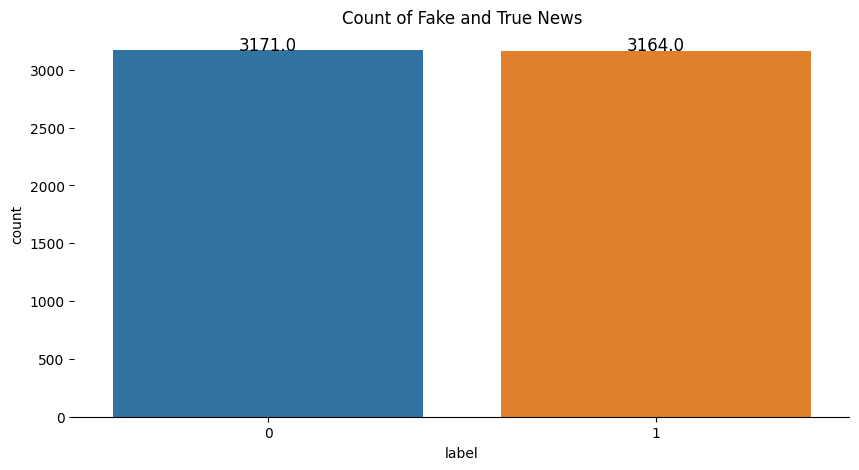

In [16]:
# Creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="label", data=new_data)
plt.title("Count of Fake and True News")

# Removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

# Annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)
    

## 2. Data Cleaning

In [17]:
# Checking the missing values in each columns in percentage
new_data.isna().sum()*100/len(new_data)


Unnamed: 0    0.0
title         0.0
text          0.0
label         0.0
dtype: float64

In [19]:
# Checking if there is empty string in TEXT column
blanks=[]

# index,label and review of the doc
for index,text in new_data["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list

len(blanks)


36

In [20]:
# Instead of dropping title colunm we are going to merge  with text

new_data["text"] =new_data["title"]+new_data["text"]

#we only need two columns rest can be ignored

df=new_data[["text","label"]]

In [21]:
df

,text,label
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathyU.S...,0
3,Bernie supporters on Twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matte...,0
...,...,...
6330,State Department says it can't find emails fro...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligarc...,1
6333,"In Ethiopia, Obama seeks progress on peace, se...",0


In [24]:
# Importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re


In [26]:
# Loading spacy library
nlp=spacy.load("en_core_web_sm")

# Creating instance
lemma=WordNetLemmatizer()


In [27]:
# Creating list of stopwords containing stopwords from spacy and nltk

# stopwords from spacy
list1=nlp.Defaults.stop_words
print(len(list1))

# stopwords from NLTK
list2=stopwords.words('english')
print(len(list2))

# combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [28]:
# Text cleaning function
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # Initialize stopwords and lemmatizer
    Stopwords = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()

    # It takes text as an input and cleans it by applying several methods
    string = ""

    # Lower casing
    text = text.lower()

    # Simplifying text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)

    # Removing any special character
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)

    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word) + " "

    return string




In [30]:
# Ensuring I have a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

# Cleaning the whole data
df.loc[:, "text"] = df["text"].apply(clean_text)

In [31]:
df.head()

,text,label
0,smell hillary feardaniel greenfield shillman j...,1
1,watch exact moment paul ryan committed politic...,1
2,kerry paris gesture sympathyu secretary state ...,0
3,bernie supporter twitter erupt anger dnc tried...,1
4,battle new york primary mattersit primary day ...,0


## 3. Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [32]:
from wordcloud import WordCloud


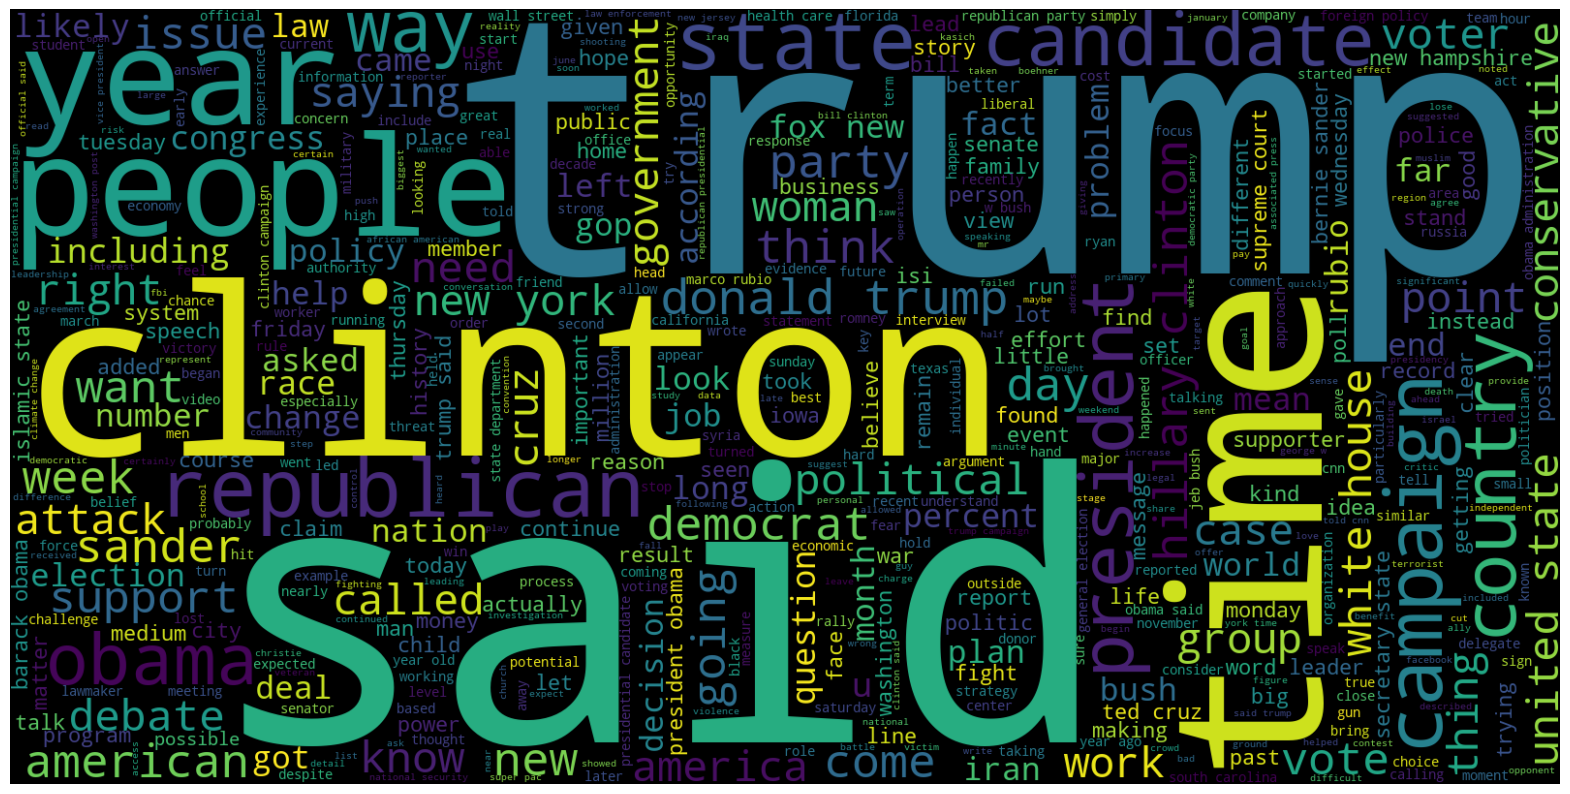

In [34]:
# Displaying frequent words in True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')


In [35]:
# creating more intiuive wordcloud 

# pil is pillow and used for image manupulation
from PIL import Image


In [46]:

# creating a mask of thumb
thumb="pngwing.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)


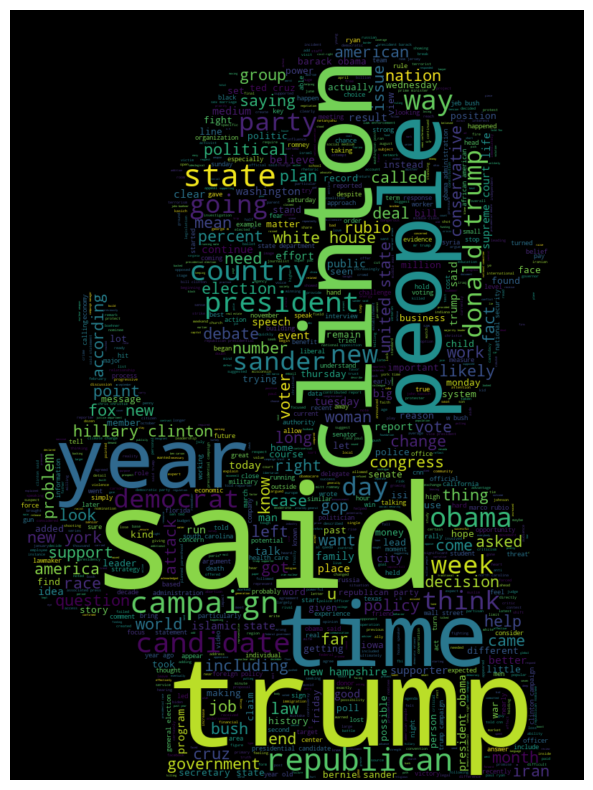

In [48]:
# True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.label == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')


In [49]:
# creating a mask of thumb
thumb="pngwingcom.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)


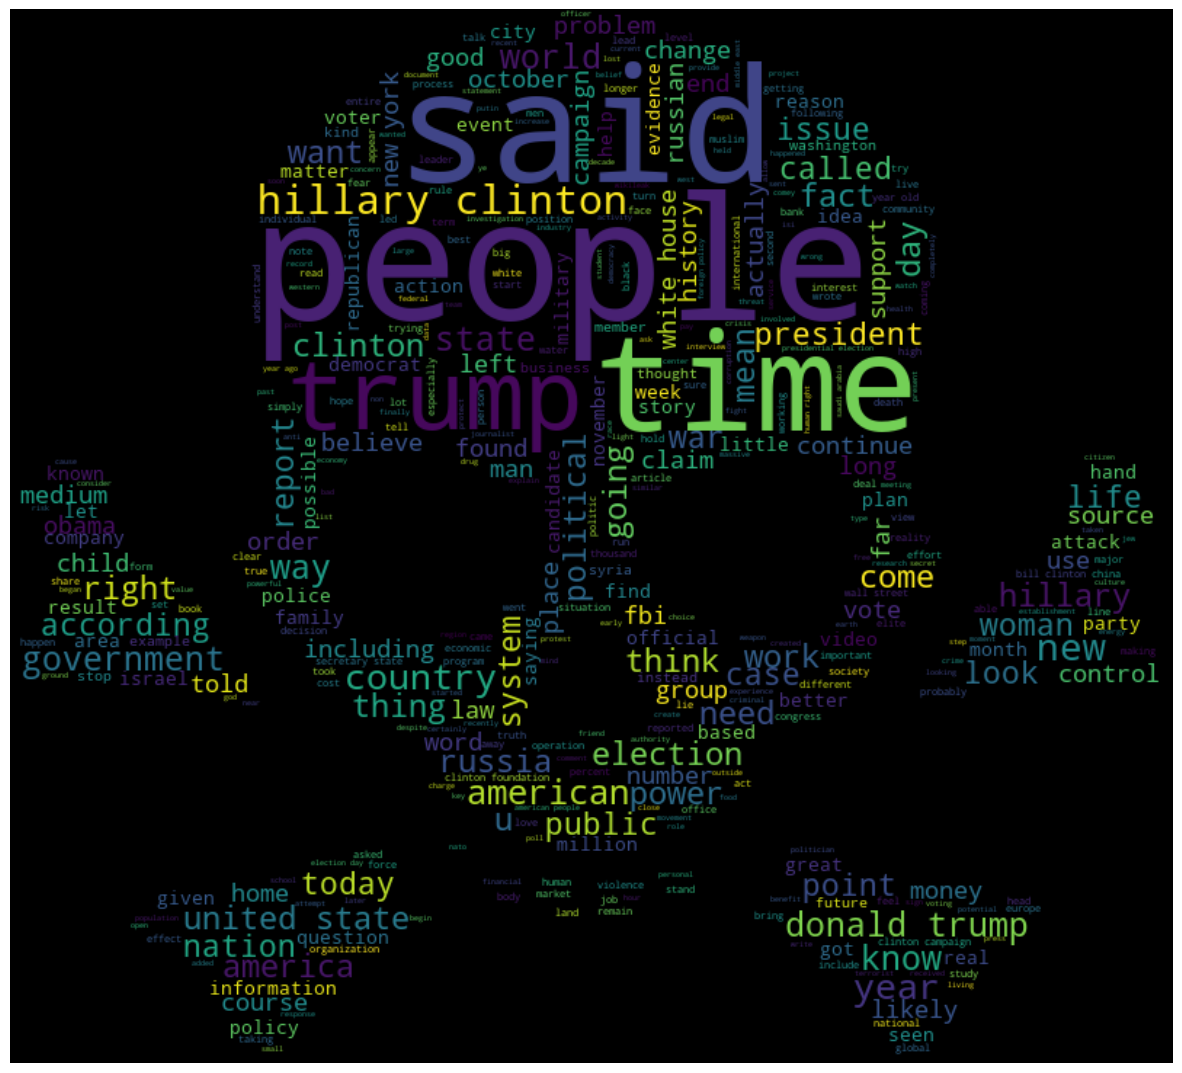

In [50]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.label == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')


## Feature-Extraction & Model building

In [74]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn import metrics


In [68]:


X=df["text"] #feature 
y=df["label"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [82]:
# Define the pipeline
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC())
])


In [85]:

# Define the hyperparameter grid to search
parameters  = {
    "tfidf__max_df": [0.5, 0.75, 1.0],
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "clf__C": [0.1, 1, 10]
}



In [86]:

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LinearSVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=1)

In [87]:

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}
Best score: 0.9319279057084767


In [89]:

# Make predictions on the test set
predictions = grid_search.predict(X_test)


In [90]:
# Evaluate the model
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       639
           1       0.95      0.92      0.93       628

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [91]:

print(metrics.accuracy_score(y_test, predictions))


0.936069455406472


In [92]:

print(metrics.confusion_matrix(y_test, predictions))


[[607  32]
 [ 49 579]]


## Save model and makke and api endpoint for it


In [95]:

from joblib import dump, load

# Save the best model from GridSearchCV using joblib
dump(grid_search.best_estimator_, 'best_model.joblib')


# pickle.dump(vect, open('vector.pkl', 'wb'))


['best_model.joblib']